In [124]:
%matplotlib notebook
import matplotlib.pyplot as plt
import json
import pandas
import pandas as pd

RECIPES_DATA_PATH = 'recipes.json'

results=[]
with open(RECIPES_DATA_PATH) as recipes_file:
    for recipe in recipes_file:
        try:
            rec = json.loads(recipe)
            results.append(rec)
        except ValueError:
            pass
print(len(results))

24


In [132]:
#create a DataFrame
recipesDataFrame = pandas.DataFrame()
recipesDataFrame['Recipe Category'] = [recipe['category'] for recipe in results]
recipesDataFrame['Recipe Cuisine'] = [recipe['cuisine'] for recipe in results]
recipesDataFrame['Category Counts'] = recipesDataFrame.groupby(['Recipe Category'])['Recipe Category'].transform('count')




In [139]:
recipe_by_cuisine = recipesDataFrame['Recipe Cuisine'].value_counts()
recipe_by_category = recipesDataFrame['Recipe Category'].value_counts()

# print(recipe_by_cuisine.head())
# print(recipe_by_category.head())


Chinese     10
Italian      3
French       3
Indian       2
American     2
Name: Recipe Cuisine, dtype: int64


<IPython.core.display.Javascript object>


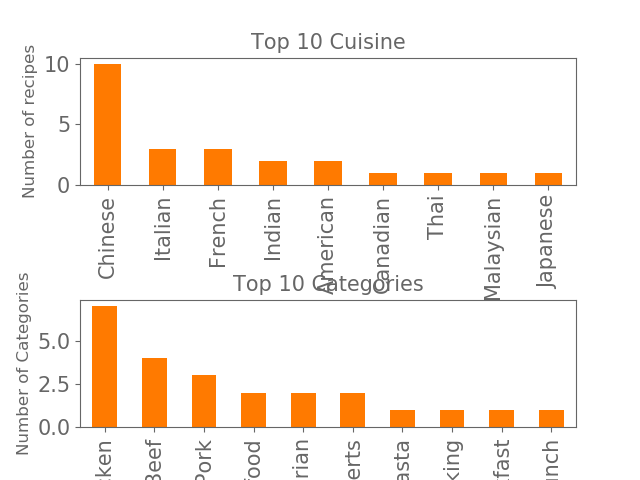

In [142]:
#create the figure
fig = plt.figure()
fig.subplots_adjust(hspace=.9)

ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

#CUISINE
ax1.tick_params(axis='x', labelsize=15)
ax1.tick_params(axis='y', labelsize=15)
ax1.set_xlabel('Cuisine', fontsize=12)
ax1.set_ylabel('Number of recipes', fontsize=12)
ax1.xaxis.label.set_color('#666666')
ax1.yaxis.label.set_color('#666666')
ax1.tick_params(axis='x', colors='#666666')
ax1.tick_params(axis='y', colors='#666666')
ax1.set_title('Top 10 Cuisine', fontsize=15, color='#666666')

#plot the top 10 Cuisine
recipe_by_cuisine[:10].plot(ax=ax1, kind='bar', color='#FF7A00')

#colour the spines(borders)
for spine in ax1.spines.values():
    spine.set_edgecolor('#666666')
    
    
#CATEGORY
ax2.tick_params(axis='x', labelsize=15)
ax2.tick_params(axis='y', labelsize=15)
ax2.set_xlabel('Categories', fontsize=12)
ax2.set_ylabel('Number of Categories', fontsize=12)
ax2.xaxis.label.set_color('#666666')
ax2.yaxis.label.set_color('#666666')
ax2.tick_params(axis='x', colors='#666666')
ax2.tick_params(axis='y', colors='#666666')
ax2.set_title('Top 10 Categories', fontsize=15, color='#666666')

#plot the top 10 Categories
recipe_by_category[:10].plot(ax=ax2, kind='bar', color='#FF7A00')

#coolor the spines(borders)
for spine in ax2.spines.values():
    spine.set_edgecolor('#666666')
    
#render the two graphs at once
plt.show()
    

